In [1]:
import pandas as pd

In [2]:
#pip install git+https://github.com/quantopian/pyfolio
# import again if first time not work
import pyfolio

/home/zhen/anaconda3/envs/py36/lib/python3.6/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [3]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

In [4]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    #df=df.dropna()
    print('Sharpe: ',(252**0.5)*df['daily_return'].mean()/ df['daily_return'].std())
    return df

In [5]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'])
    strategy_ret.set_index('Date', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

In [6]:
def get_account_value(model_name):
    df_account_value=pd.DataFrame()
    for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
        temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format(model_name,i))
        df_account_value = df_account_value.append(temp,ignore_index=True)
    df_account_value = pd.DataFrame({'account_value':df_account_value['0']})
    sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
    print(sharpe)
    df_account_value=df_account_value.join(df_trade_date[63:].reset_index(drop=True))
    return df_account_value

## APPL

In [7]:
df_apple = pd.read_csv("done_data.csv")
df_apple = df_apple[df_apple.tic == 'AAPL']

In [8]:
test_apple=df_apple[(df_apple.datadate > 20151001)&(df_apple.datadate <= 20200707)]
test_apple = test_apple.reset_index(drop=True)

In [9]:
test_apple['daily_return']=test_apple['adjcp'].pct_change(1)

In [10]:
test_apple['Date'] = pd.to_datetime(test_apple['datadate'], format='%Y%m%d')

In [11]:
appl_strat = backtest_strat(test_apple)

## Ensemble Strategy

In [12]:
df=pd.read_csv('data/dow_30_2009_2020.csv')

In [13]:
rebalance_window = 63
validation_window = 63
unique_trade_date = df[(df.datadate > 20151001)&(df.datadate <= 20200707)].datadate.unique()


In [14]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

In [15]:
ensemble_account_value = get_account_value('ensemble')

1.6072941708145294


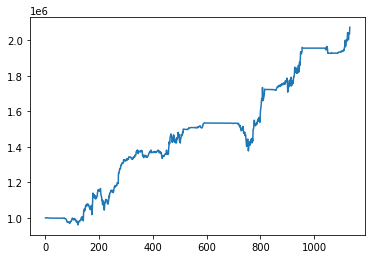

In [16]:
ensemble_account_value.account_value.plot()

In [17]:
ensemble_account_value = get_daily_return(ensemble_account_value)

Sharpe:  1.6072941708145294


In [18]:
ensemble_account_value['Date'] = test_dji['Date']

NameError: name 'test_dji' is not defined

In [ ]:
ensemble_account_value.head()

In [ ]:
ensemble_strat = backtest_strat(ensemble_account_value[0:1097])

In [ ]:
#ensemble_account_value.to_csv('results/df_account_value_ensemble_daily_return.csv',index=False)

In [ ]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = ensemble_strat,
                                   benchmark_rets=appl_strat, set_context=False)